In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
#Load the dataset
df_clustering_data = pd.read_csv('data/df_incidents_poverty_house_data_preparation_final.csv')

In [42]:
df_clustering_data.head()

,latitude,longitude,avg_age_participants,males_ratio,state_congressional_district,povertyPercentage,killed_ratio,injured_ratio,unharmed_ratio,candidate_winning_ratio,age_poverty_product,males_in_month_ratio,killed_in_month_ratio,injured_in_month_ratio,unharmed_in_month_ratio
0,39.8322,-86.2492,19.0,1.0,indiana_7,12.3,0.0,1.0,0.0,0.547323,233.7,0.009434,0.0,0.031250,0.000000
1,41.6645,-78.7856,62.0,1.0,pennsylvania_5,10.5,1.0,0.0,0.0,0.671644,651.0,0.100000,0.5,0.000000,0.000000
2,42.4190,-83.0393,24.0,1.0,michigan_14,11.0,0.0,0.5,0.5,0.785066,264.0,0.032787,0.0,0.041667,0.047619
3,38.9647,-94.4654,29.0,1.0,missouri_5,11.9,0.0,0.0,0.0,0.588294,345.1,0.014286,0.0,0.000000,0.000000
4,34.3904,-117.3770,19.0,1.0,california_8,11.0,1.0,0.0,0.0,0.599672,209.0,0.047619,0.2,0.000000,0.000000


In [43]:
print('Shape of Dataset: ',df_clustering_data.shape)

Shape of Dataset:  (98321, 15)


In [44]:
# Filter data for a specific state (e.g., Alabama)
selected_state = 'alabama'
df_selected_state = df_clustering_data[df_clustering_data['state_congressional_district'].str.startswith(selected_state)]

In [45]:
# Extract features
features_selected_state = df_selected_state[['latitude', 'longitude', 'avg_age_participants', 'males_ratio', 'povertyPercentage',
                                             'killed_ratio', 'injured_ratio', 'unharmed_ratio', 'candidate_winning_ratio',
                                             'age_poverty_product', 'males_in_month_ratio', 'killed_in_month_ratio',
                                             'injured_in_month_ratio', 'unharmed_in_month_ratio']]

In [46]:
# Standardize the features
scaler_selected_state = StandardScaler()
features_standardized_selected_state = scaler_selected_state.fit_transform(features_selected_state)

## Agglomerative Hierarchical Clustering

In [47]:
# Perform hierarchical clustering using different linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']

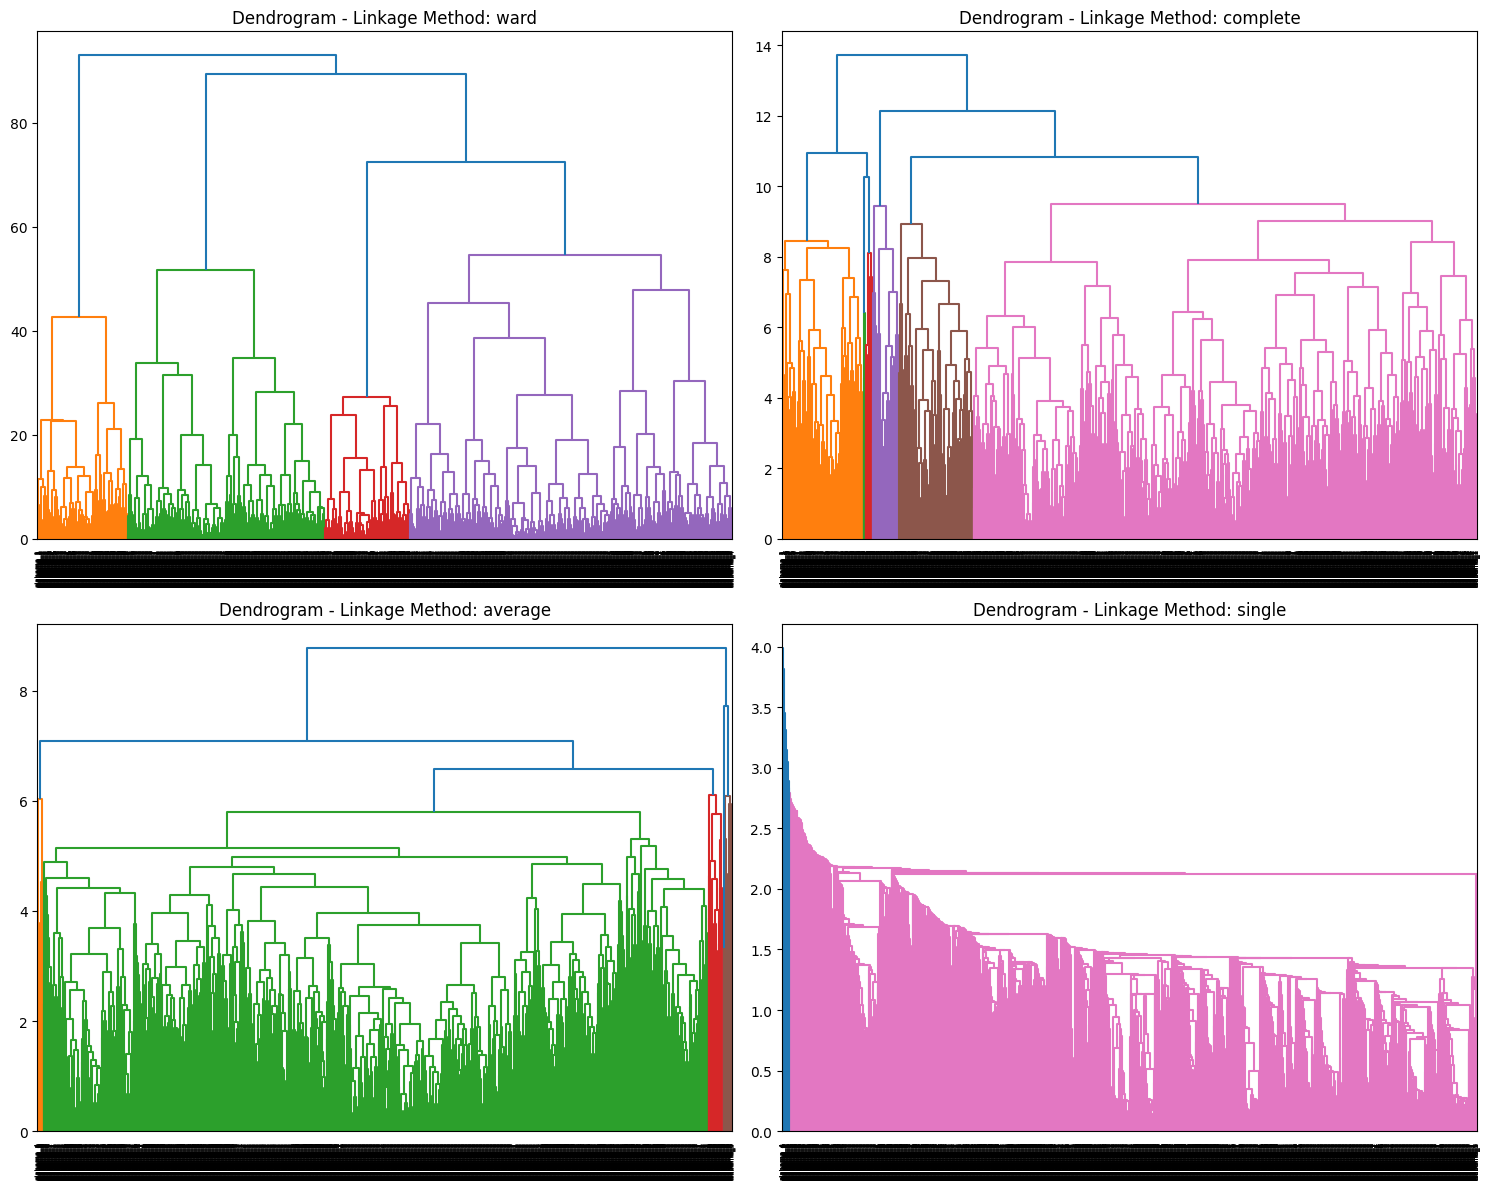

In [48]:
# Create subplots for each linkage method
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for i, method in enumerate(linkage_methods):
    # Calculate linkage matrix
    Z = linkage(features_standardized_selected_state, method=method)

    # Plot dendrogram
    dendrogram(Z, labels=df_selected_state['state_congressional_district'].tolist(), ax=axes[i//2, i%2], orientation='top')
    axes[i//2, i%2].set_title(f'Dendrogram - Linkage Method: {method}')

plt.tight_layout()
plt.show()

In [49]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, fcluster

# Function to perform hierarchical clustering and evaluate
def hierarchical_clustering_evaluation(data, linkage_method):
    # Calculate linkage matrix
    Z = linkage(data, method=linkage_method)
    
    # Perform hierarchical clustering
    labels = fcluster(Z, t=5, criterion='maxclust') # t: number of clusters
    
    # Evaluate clustering results
    silhouette = silhouette_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)
    
    return labels, silhouette, calinski_harabasz

# Evaluate clustering for each linkage method
evaluation_results = {}

for method in linkage_methods:
    labels, silhouette, calinski_harabasz = hierarchical_clustering_evaluation(features_standardized_selected_state, method)
    
    # Store results
    evaluation_results[method] = {'labels': labels, 'silhouette': silhouette, 'calinski_harabasz': calinski_harabasz}

# Print evaluation results
for method, results in evaluation_results.items():
    print(f"Linkage Method: {method}")
    print(f"Silhouette Score: {results['silhouette']:.3f}")
    print(f"Calinski-Harabasz Score: {results['calinski_harabasz']:.3f}")
    print("-----------------------------")

Linkage Method: ward
Silhouette Score: 0.141
Calinski-Harabasz Score: 337.769
-----------------------------
Linkage Method: complete
Silhouette Score: 0.121
Calinski-Harabasz Score: 203.973
-----------------------------
Linkage Method: average
Silhouette Score: 0.226
Calinski-Harabasz Score: 66.002
-----------------------------
Linkage Method: single
Silhouette Score: 0.289
Calinski-Harabasz Score: 4.774
-----------------------------


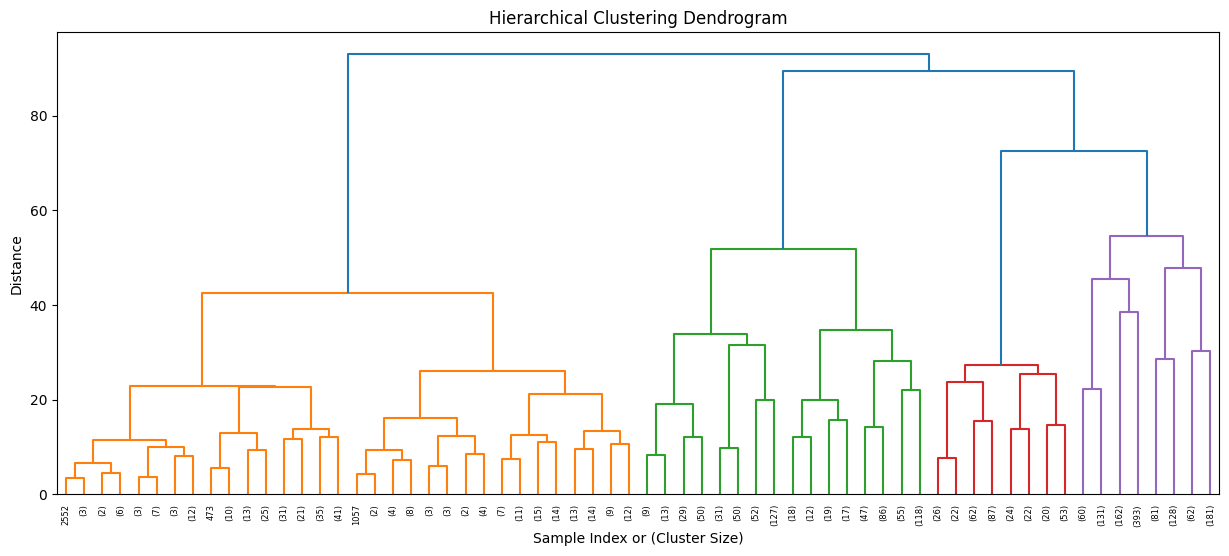

In [51]:
# Perform hierarchical clustering
linkage_matrix = linkage(features_standardized_selected_state, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(15, 6))
dendrogram(linkage_matrix, p=5, truncate_mode='level')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()

In [57]:
# Cut the dendrogram to get k clusters
k = 5 
labels = fcluster(linkage_matrix, k, criterion='maxclust')

In [58]:
# Convert labels to integers
labels = labels.astype(int)


In [59]:
# Add the cluster labels to the dataframe
features_standardized_selected_state = pd.DataFrame(features_standardized_selected_state, columns=features_selected_state.columns)
df_clustered = features_standardized_selected_state.copy()
df_clustered['Cluster'] = labels

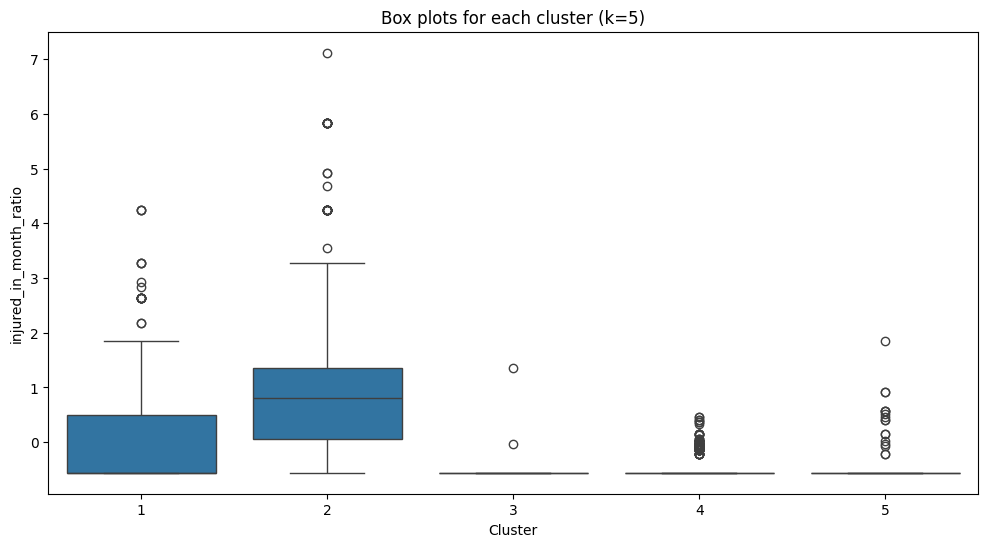

In [60]:
# Plot box plots for each cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='injured_in_month_ratio', data=df_clustered)
plt.title(f'Box plots for each cluster (k={k})')
plt.show()

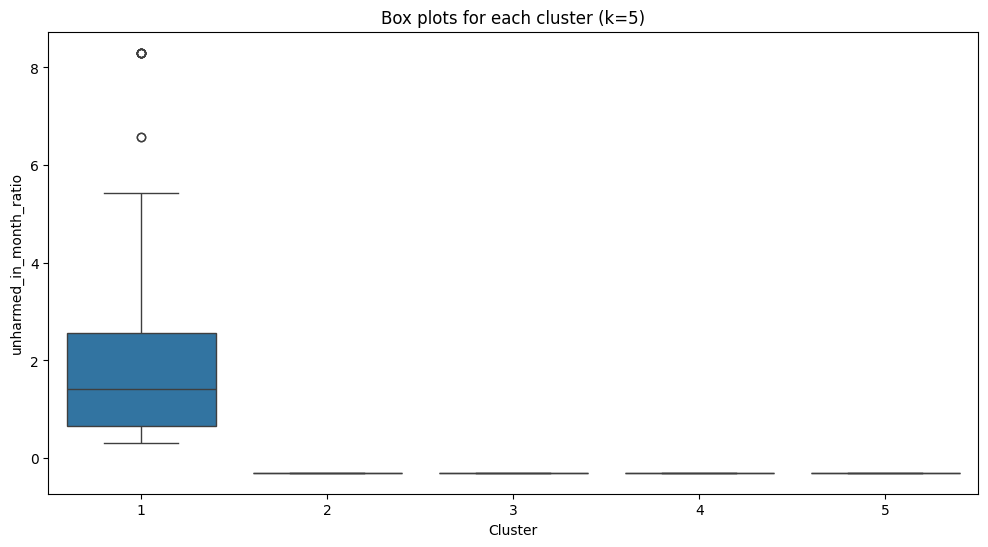

In [61]:
# Plot box plots for each cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='unharmed_in_month_ratio', data=df_clustered)
plt.title(f'Box plots for each cluster (k={k})')
plt.show()

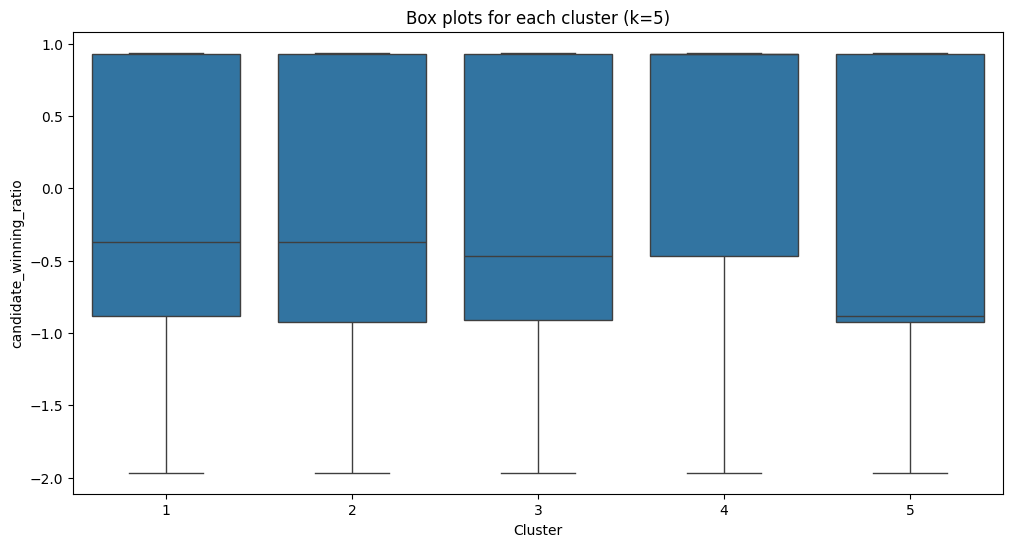

In [62]:
# Plot box plots for each cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='candidate_winning_ratio', data=df_clustered)
plt.title(f'Box plots for each cluster (k={k})')
plt.show()

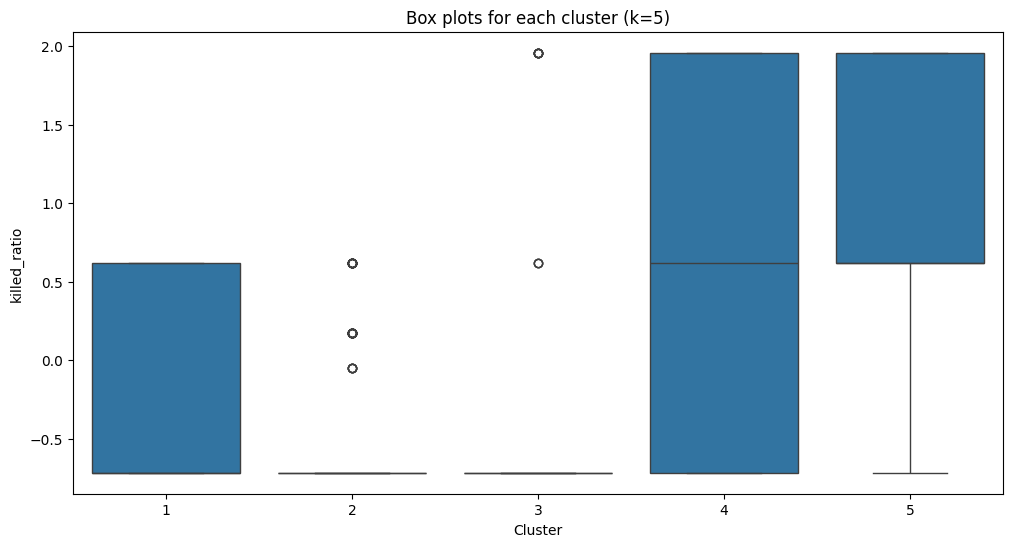

In [63]:
# Plot box plots for each cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='killed_ratio', data=df_clustered)
plt.title(f'Box plots for each cluster (k={k})')
plt.show()

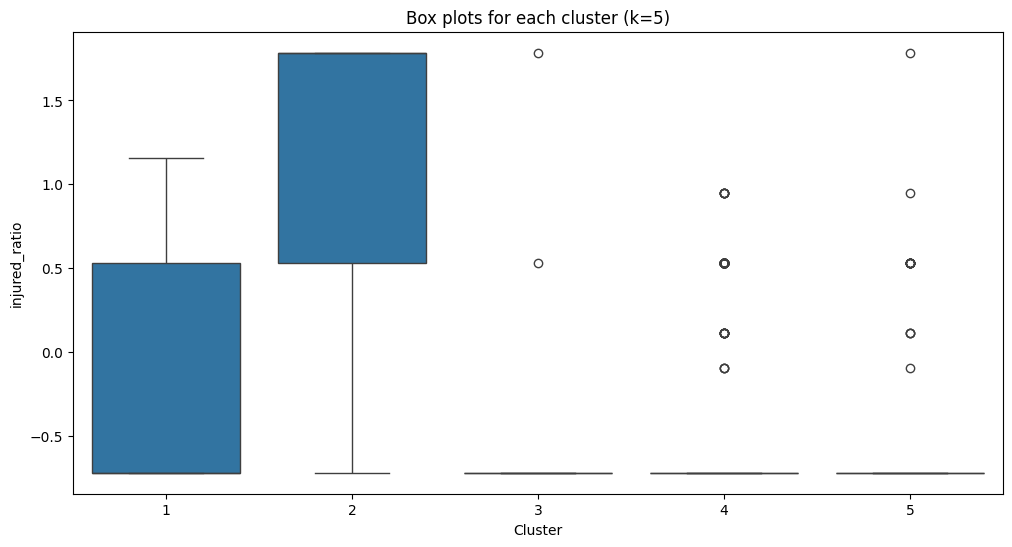

In [65]:
# Plot box plots for each cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='injured_ratio', data=df_clustered)
plt.title(f'Box plots for each cluster (k={k})')
plt.show()

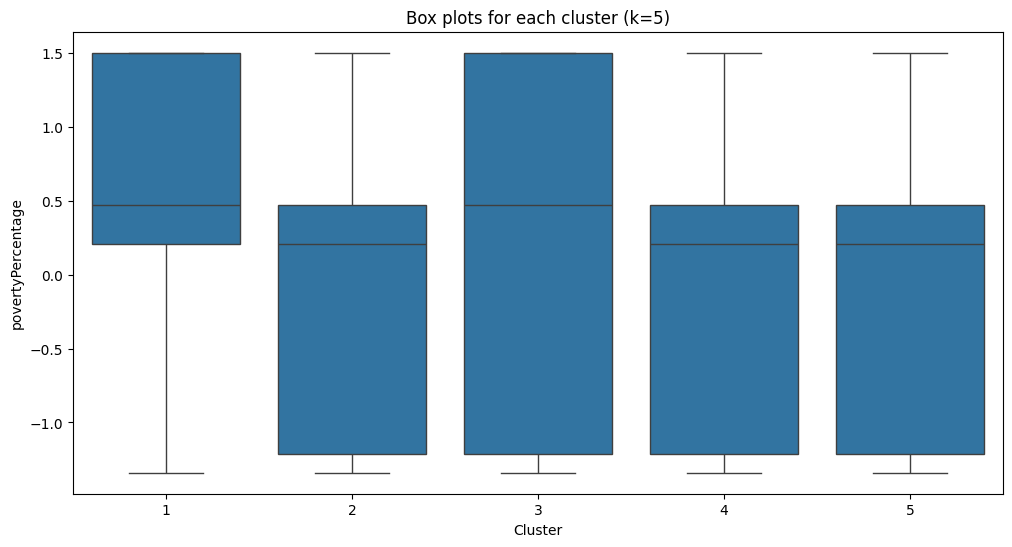

In [66]:
# Plot box plots for each cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='povertyPercentage', data=df_clustered)
plt.title(f'Box plots for each cluster (k={k})')
plt.show()

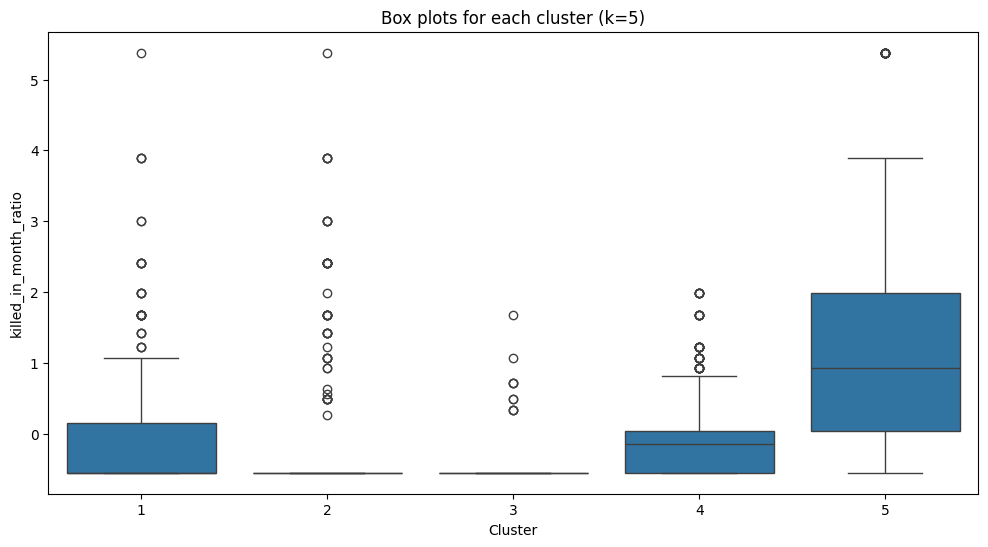

In [67]:
# Plot box plots for each cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='killed_in_month_ratio', data=df_clustered)
plt.title(f'Box plots for each cluster (k={k})')
plt.show()